In [31]:
from astropy.io import fits
file1=fits.open('hlsp_hugs_hst_acs-wfc_ngc0362_f814w_v1_stack-0010s.fits')
print(file1)

In [32]:
image_data = file1[0].data
print(image_data)

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]


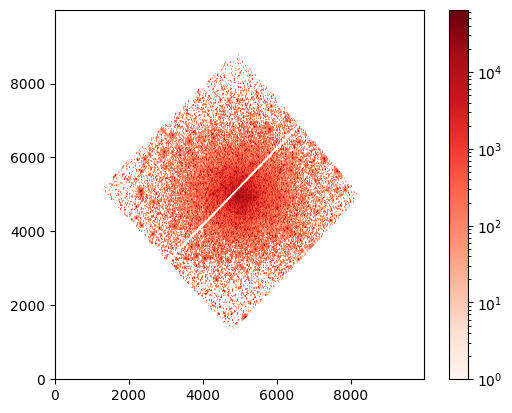

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(image_data, origin='lower',norm=LogNorm(),cmap='Reds')
plt.colorbar()
plt.show()






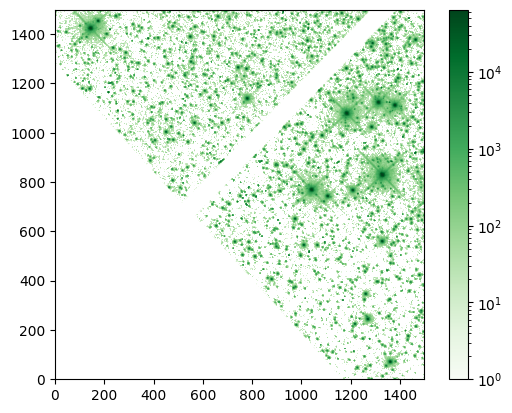

In [38]:
sec1=image_data[2500:4000,2500:4000]
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sec1, origin='lower',norm=LogNorm(),cmap='Greens')
plt.colorbar()
plt.show()

In [39]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(sec1, sigma=3.0)
print((mean, median, std))


(-9.733794, -13.0, 55.554688)


In [42]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)
sources= daofind(sec1-median)
for col in sources.colnames:
    if col not in ('id','npix'):
        sources[col].info.format = '%.2f'

sources.pprint(max_width=76) 
        
        

 id  xcentroid ycentroid sharpness roundness1 ... sky    peak    flux  mag 
---- --------- --------- --------- ---------- ... ---- -------- ----- -----
   1   1283.25      0.34      0.83      -0.31 ... 0.00  8098.00 21.28 -3.32
   2   1377.32      0.32      1.00      -0.27 ... 0.00  7804.00 17.02 -3.08
   3   1393.05      0.38      0.90       0.37 ... 0.00   484.00  1.04 -0.04
   4   1272.14      2.62      0.65      -0.02 ... 0.00  3318.00  9.45 -2.44
   5   1177.50      5.88      0.67      -0.57 ... 0.00   842.00  2.75 -1.10
   6   1190.53      6.20      0.44       0.61 ... 0.00   363.00  1.38 -0.35
   7   1327.68     11.72      0.74      -0.07 ... 0.00 12484.00 31.13 -3.73
   8   1408.21     13.85      0.54      -0.21 ... 0.00  1254.00  4.03 -1.51
   9   1215.94     18.41      0.53      -0.14 ... 0.00   926.00  3.25 -1.28
  10   1343.36     21.60      0.69      -0.69 ... 0.00  3316.00  8.29 -2.30
 ...       ...       ...       ...        ... ...  ...      ...   ...   ...
4718   1127.

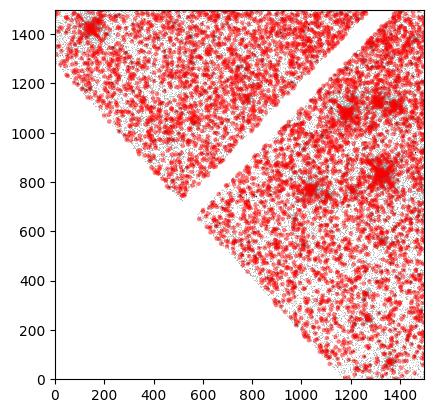

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=5.0)
plt.imshow(sec1, cmap='Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')

apertures.plot(color = 'red', lw=1.5, alpha=0.5);


 